In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [63]:
import io 
%cd '/Users/mdosman/Downloads'

/Users/mdosman/Downloads


In [64]:
df=pd.read_csv("Mall_Customers-1.csv")

In [65]:
df

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
df=pd.get_dummies(df,columns=["Gender"])

In [68]:
df

,CustomerID,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
0,1,19,15,39,False,True
1,2,21,15,81,False,True
2,3,20,16,6,True,False
3,4,23,16,77,True,False
4,5,31,17,40,True,False
...,...,...,...,...,...,...
195,196,35,120,79,True,False
196,197,45,126,28,True,False
197,198,32,126,74,False,True
198,199,32,137,18,False,True


In [69]:
df=df.drop(["CustomerID"],axis=1)

In [70]:
df

,Age,Annual_Income_(k$),Spending_Score,Gender_Female,Gender_Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
195,35,120,79,True,False
196,45,126,28,True,False
197,32,126,74,False,True
198,32,137,18,False,True


In [71]:
from sklearn.cluster import KMeans

# Elbow plot 

# for elbow plot we need find wcss

In [72]:
wcss=[]


for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=42,n_init="auto")
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

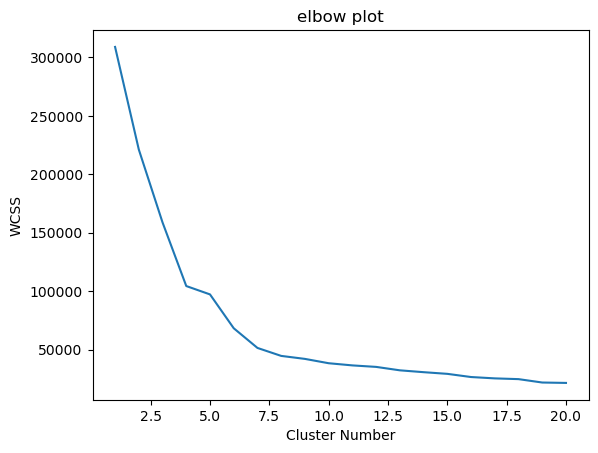

In [73]:
# Elbow plot 


plt.plot(range(1,21),wcss)
plt.title("elbow plot")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")
plt.show()


# One more method silhouettee score is a metric is used to calculate the goodness of a clustering technique.


# it values ranges from -1 to 1 .


# closer to 1 : means clusters are well apart from each other and clearly distinguished. Typically >0.50.


# 0: Means clusters are indifferent or we can say that the distance between clusters is not significant .

# -1 means clusters are assigned in wrong way. 




In [74]:
from sklearn.metrics import silhouette_score

In [81]:
silhouette=[]

k_range=range(2,10)

for i in k_range:
    kmeans=KMeans(n_clusters=i,n_init="auto",random_state=42)
    kmeans.fit(df)
    labels=kmeans.labels_
    silhouette.append(silhouette_score(df,labels))
    
    
    
    

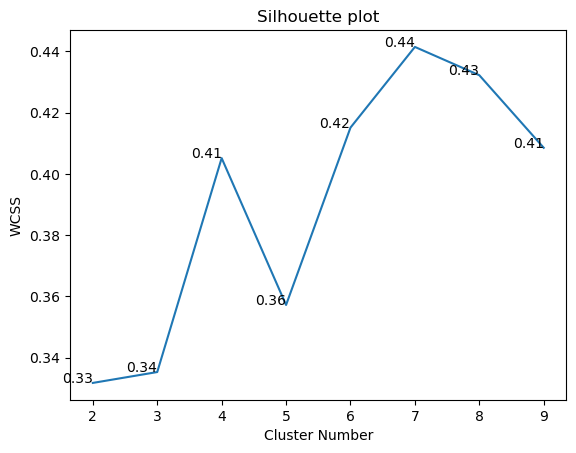

In [82]:
plt.plot(range(2,10),silhouette)
plt.title("Silhouette plot")
plt.xlabel("Cluster Number")
plt.ylabel("WCSS")


# Enumerate is used to display the scores of Silhoueetee
for i,silhouette in enumerate(silhouette):
    plt.text(k_range[i],silhouette,round(silhouette,2),ha="right")
plt.show()    

In [83]:
kmeansmodel=KMeans(n_clusters=6).fit(df)

In [84]:
kmeansmodel.cluster_centers_

array([[27.        , 56.65789474, 49.13157895,  0.65789474,  0.34210526],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [56.15555556, 53.37777778, 49.08888889,  0.55555556,  0.44444444],
       [44.14285714, 25.14285714, 19.52380952,  0.61904762,  0.38095238],
       [41.68571429, 88.22857143, 17.28571429,  0.42857143,  0.57142857],
       [25.27272727, 25.72727273, 79.36363636,  0.59090909,  0.40909091]])

In [85]:
df.columns

Index(['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

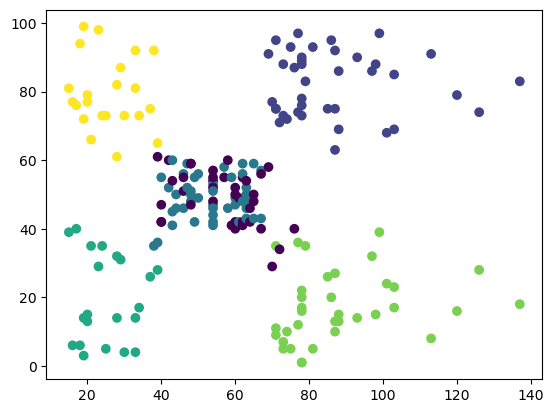

In [86]:
plt.scatter(x='Annual_Income_(k$)',y='Spending_Score',data=df,c=kmeansmodel.labels_)